# CS 512 F24: Assignment 2

Due by 9/29/2024

**Name:** Tamilarasee Sethuraj

**Student ID:** A20553416



**Task:** Load a grayscale image and generate 10 noisy versions by adding Gaussian noise with a fixed standard deviation and zero mean. Compute the noise variance by calculating the pixel-wise standard deviation across the 10 noisy images (without directly accessing the noise itself). Compute the signal power as the variance (square of the standard deviation) of the original grayscale image. Finally, calculate the SNR in dB using the ratio of the signal power to the noise power. . 

**Hints:**
- Use cv2.imread() to load the image as grayscale using the cv2.IMREAD_GRAYSCALE argument. 
- To generate Gaussian noise, you can use numpy.random.normal()
- To clip the noisy image within the valid pixel range (0 to 255), use numpy.c1ip()
- The variance can be computed with numpy.var()
- For logarithmic functions, use numpy.log10() to calculate the SNR in decibels, 


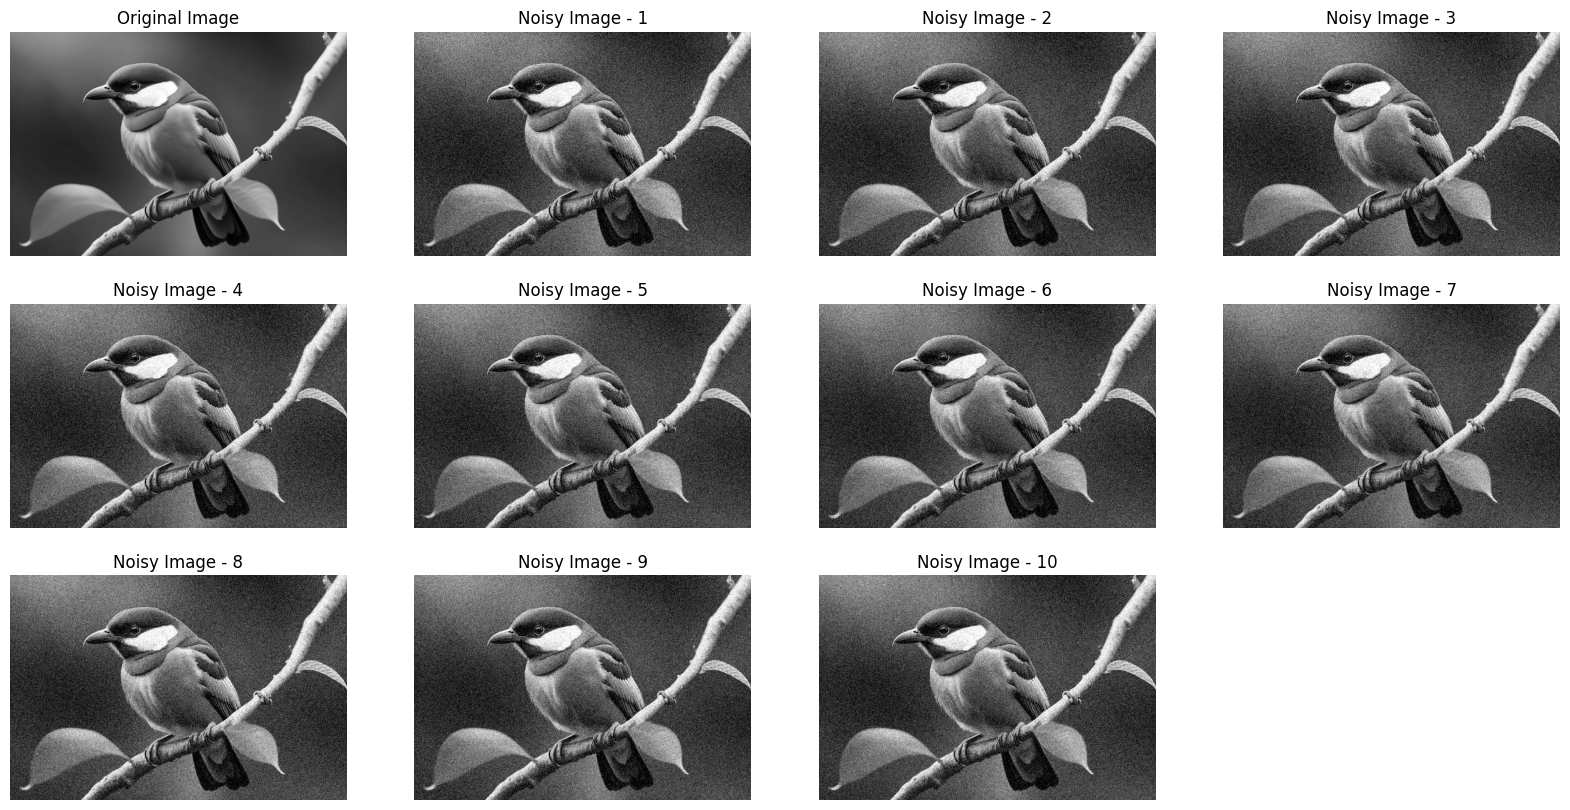

In [2]:
#Starter code:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Load the image and convert to grayscale 
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE) 
original_image = image.astype(np.float32) # Convert to float for precise calculations

#Plot the original Grayscale image
plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title("Original Image")

# Parameters for Gaussian noise 
std_dev = 20 # Known standard deviation for Gaussian noise
mean = 0 # Mean of the Gaussian noise 
num_noisy_images = 10 # Number of noisy images to generate

# Generate 10 noisy versions of the grayscale image 
noisy_images = [] 
for i in range(num_noisy_images): 
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32) 
    noisy_image = np.clip(original_image + noise, 0, 255) # Clip values to be in valid range 
    noisy_images.append(noisy_image)

    #plot the noisy images
    plt.subplot(3,4,i+2)
    plt.title(f"Noisy Image - {i+1}")
    plt.imshow(noisy_image, cmap='gray')
    plt.axis('off')
    

**Calculation of Noise Power:**
The 10 noisy images are stacked like slices thereby creating the 3D array of depth 10. Each point/pixel in the image is compared with the corresponding pixel across the depth of 10 images and the standard deviation is calculated. We then calculate the noise variance from standard deviation to know how much variation is present across the 10 images at each pixel. To calulate the noise power, take mean of the noise variance of all the pixels which conveys the measure of the overall noise level

In [3]:
# Calculate the pixel-wise standard deviation across the noisy images
noisy_images_stack = np.stack(noisy_images, axis=0) 
noise_std = np.std(noisy_images_stack, axis=0) 
noise_var = noise_std**2 
print("Noise variance\n",noise_var)

# Compute the noise power as the mean of the noise variance
noise_power = np.mean(noise_var)
print("\nNoise Power - ", noise_power)

Noise variance
 [[348.4952   195.84808  376.56317  ...  86.794235 667.42847  565.53577 ]
 [355.13788  444.33093  646.9395   ... 314.0998   362.59433  265.91995 ]
 [416.27252  342.8653    99.84132  ... 109.31189  123.541374 180.5405  ]
 ...
 [333.96786  266.49432  667.45636  ... 474.06863  429.25284  413.20847 ]
 [563.8065   181.23215  566.6851   ... 278.7184   483.50003  208.65799 ]
 [149.51959  239.72221  303.64783  ... 406.92194  321.4146    59.38918 ]]

Noise Power -  350.3585


$$SNR[db] = 10 log_{10} (E_s/E_n)$$

where $E_s = \sigma_s^2$ and
$E_n = \sigma_n^2$ 


In [4]:
# Compute the signal power as the variance of the original image
signal_power = np.var(original_image)
print("Signal power - ",signal_power)

# Compute the SNR in decibels (dB)
SNR = 10 * np.log10(signal_power/noise_power)
print(f"SNR - {SNR} db")


Signal power -  2243.777
SNR - 8.06467056274414 db


# 2. Implement a Convolution Filter for Smoothing

**Task:** Load a grayscale image. Implement a basic 3x3 convolution filter. Pad the image with zeros so that the convolution result has the same dimensions as the input. Define a basic 3x3 smoothing filter. Apply the filter to a grayscale image using your function and OpenCV's function, and compare the execution time. Display the original and smoothed images. Explain the performance difference between your implementation and OpenCV's convolution.

**Hints:**
- Implement the manual convolution by creating a sliding window over the image.Pad the image with numpy.pad() before the convolution.
- For OpenCV's convolution use cv2.filter2D with borderType=cv2.BORDER_CONSTANT 
- To visualize the results, use matplotlib.pyplot. imshow() 

For same convolution, 

$$
\text{padding width} = \frac{\text{kernel width} - 1}{2}
$$

$$
\text{padding height} = \frac{\text{kernel height} - 1}{2}
$$

In [5]:
# Starter code
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import time

# Function for manual convolution using zero padding 
def manual_convolution(image, kernel):
   
    padding = int(kernel.shape[0] - 1) //2    # additional width calculation to maintain the image shape
    padded_image = np.pad(image,pad_width=padding,mode='constant',constant_values=0) 
    # In np.pad fn, by default, mode and constant values are set as above. pad width is set to 1 because we have 3x3 filter
    print("Manual Convolution - Padded image\n",padded_image)


    output_image = np.zeros(image.shape,dtype=image.dtype)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            row_start  = i
            row_end = row_start + kernel.shape[0]
            col_start = j
            col_end = col_start + kernel.shape[1]
        
            output_image[i][j] = np.sum(padded_image[row_start:row_end, col_start:col_end] * kernel)            

    return output_image


In [6]:
# Load the image and convert it to grayscale 
image = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)
print("Original image\n",image)
# Define a 3x3 averaging filter (kernel) 
kernel = np.ones((3, 3)) /9.0

print("\nOriginal Image shape - ", image.shape)

Original image
 [[130 121 147 ... 131 113 140]
 [134 147 117 ... 135 134 153]
 [125 146 151 ... 117 122 168]
 ...
 [  4  11  17 ...  44  55  33]
 [ 13  30  35 ...  38  53  27]
 [ 28  51  55 ...  60  82  61]]

Original Image shape -  (300, 300)


In [7]:
# Time the convolution implementations 
start_manual = time.time() 
smoothed_image_manual = manual_convolution(image, kernel) 
print(f"\nManual smoothed image of shape - {smoothed_image_manual.shape}\n",smoothed_image_manual)
end_manual = time.time() 
start_opencv = time.time() 
smoothed_image_opencv = cv2.filter2D(image, -1, kernel, borderType=cv2. BORDER_CONSTANT)  #-1 helps to maintain the depth of the output image same as the input, border_constant - does padding (zero by default)
print(f"\nOpenCV smoothed image of shape - {smoothed_image_opencv.shape}\n",smoothed_image_opencv)
end_opencv = time.time() 
print(f"\nManual convolution time: {end_manual - start_manual:.5f} seconds")
print(f"OpenCV convolution time (zero padding): {end_opencv - start_opencv:.5f} seconds")
 

Manual Convolution - Padded image
 [[  0   0   0 ...   0   0   0]
 [  0 130 121 ... 113 140   0]
 [  0 134 147 ... 134 153   0]
 ...
 [  0  13  30 ...  53  27   0]
 [  0  28  51 ...  82  61   0]
 [  0   0   0 ...   0   0   0]]

Manual smoothed image of shape - (300, 300)
 [[ 59  88  92 ...  89  89  60]
 [ 89 135 136 ... 132 134  92]
 [ 94 144 142 ... 130 138  94]
 ...
 [  8  16  20 ...  50  44  31]
 [ 15  27  32 ...  55  50  34]
 [ 13  23  27 ...  37  35  24]]

OpenCV smoothed image of shape - (300, 300)
 [[ 59  88  92 ...  89  90  60]
 [ 89 135 136 ... 132 135  92]
 [ 94 144 143 ... 130 138  95]
 ...
 [  9  16  20 ...  51  45  31]
 [ 15  27  32 ...  55  50  35]
 [ 14  24  27 ...  38  36  25]]

Manual convolution time: 2.19606 seconds
OpenCV convolution time (zero padding): 0.00973 seconds


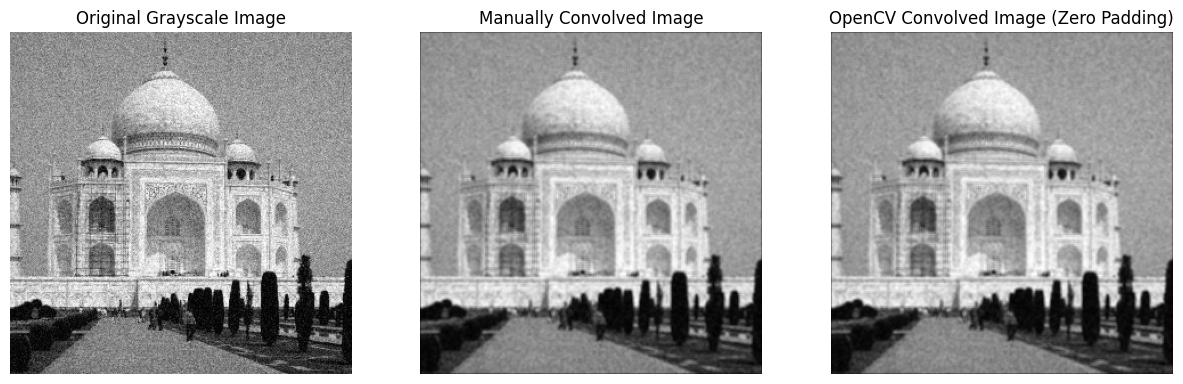

In [8]:
# Display the original, manually convolved, and OpenCV-convolved images 
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.axis('off')
plt.title("Original Grayscale Image") 
plt.subplot(1, 3, 2) 
plt.imshow(smoothed_image_manual, cmap='gray') 
plt.axis('off')
plt.title("Manually Convolved Image")
plt.subplot(1, 3, 3) 
plt.imshow(smoothed_image_opencv, cmap='gray') 
plt.title("OpenCV Convolved Image (Zero Padding)") 
plt.axis('off')
plt.show()

As per output above, we see that OpenCV function executes faster the manually implemented convolution. It may be the case because the library have efficient logic for handling the calculations and memory.

Convolution of the input image with the averaging filter smoothens and blurs the noise in image.

 # 3. Convolution with Stride

**Task:** Implement a 3x3 convolution with a stride on a grayscale image. Experiment with different stride values and observe the differences in output.
**Hints:**
- For convolution with a stride, implement a loop with a step size that corresponds to the stride value. 
- Pad the image with numpy.pad() before the convolution


$$
\text{height\_out} = \frac{\text{height\_in} - \text{height\_kernel} + 2 \times \text{padding}}{\text{stride}} + 1
$$


$$
\text{width\_out} = \frac{\text{width\_in} - \text{width\_kernel} + 2 \times \text{padding}}{\text{stride}} + 1
$$



In [9]:
#Starter code:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import time

# Function for convolution with stride and zero padding, accepting kernel as argument 

def convolution_with_stride(image, kernel, stride=2): 
    
    padding = int(kernel.shape[0] - 1) //2    
    padded_image = np.pad(image,pad_width=padding,mode='constant',constant_values=0) 
    # In np.pad fn, by default, mode and constant values are set as above. pad width is set to 1 because we have 3x3 filter
    
    height_in, width_in = image.shape
    height_kernel, width_kernel = kernel.shape

    height_out = (height_in - height_kernel + 2*padding )//stride + 1
    width_out = (width_in - width_kernel + 2*padding )//stride + 1

    output_image = np.zeros((height_out,width_out))

    for i in range(height_out):
        for j in range(width_out):

            row_start  = i*stride  #For every iteration, jump by the step size of stride
            row_end = row_start + kernel.shape[0]
            col_start = j*stride
            col_end = col_start + kernel.shape[1]
        
            output_image[i][j] = np.sum(padded_image[row_start:row_end, col_start:col_end] * kernel)  
    
    return output_image

In [10]:
# Load the image and convert it to grayscale 
image = cv2.imread("image1.jpg", cv2.IMREAD_GRAYSCALE)

#Define a 3x3 averaging filter (kernel) as an argument 
kernel = np.ones((3, 3)) /9.0

#Apply the convolution with different strides
strides = [2,3,6,8,10]
smoothed_images = []
for stride in strides:
    smoothed_image = convolution_with_stride(image, kernel,stride)
    smoothed_images.append(smoothed_image)

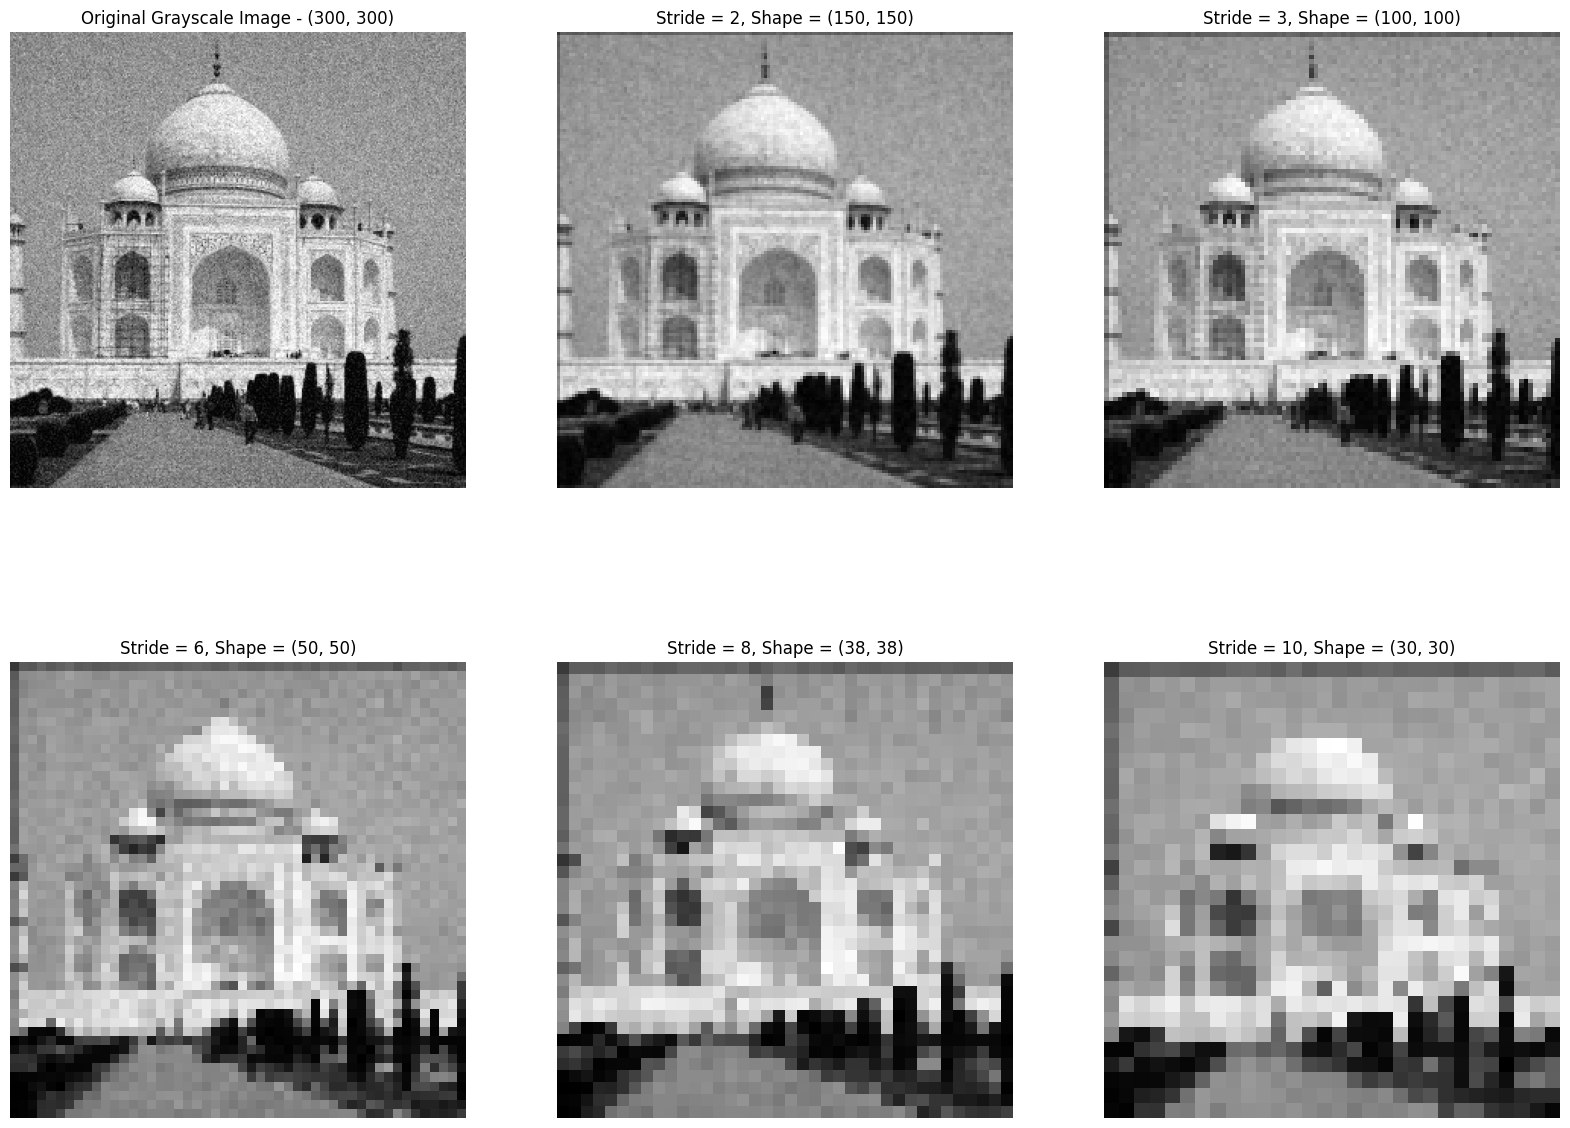

In [11]:
# Display the original and convolved images 
plt.figure(figsize=(20, 15)) 
plt.subplot(2, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.axis("off")
plt.title(f"Original Grayscale Image - {image.shape}") 


for i in range(len(smoothed_images)):
    plt.subplot(2, 3, i+2)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f"Stride = {strides[i]}, Shape = {smoothed_images[i].shape}") 
    plt.axis("off")
    

From above images, we see that the increase in stride smoothens/blurs the image more . This is because when we increase the stride, we slide through the original image pixels with bigger step size thereby losing more information and resulting in blurred image.

The size of the output image gets reduced based on the value of the stride.

# 4. Compute and apply a Gaussian Smoothing Filter

**Task:** Compute an arbitrary size 2D Gaussian filter using the 2D Gaussian function. Print the Gaussian kernel. Apply the kernel to a grayscale image and display the result. Determine what the maximum allowed standard deviation (stdv) should be for a 5x5 filter, and explain your reasoning

**Hints:**
- Write a gaussian_kernel(size, sigma) function to generate the Gaussian kernel. 
- Apply the kernel using cv2.filter2D 


In [12]:
# Starter code:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a 2D Gaussian kernel 

def gaussian_kernel(size, sigma): 

    kernel = np.ones((size,size))
    middle = size // 2
    for i in range(size):
        for j in range(size):
            x = i - middle
            y = j - middle
            kernel[i][j] = np.exp(- (x**2 + y**2)/(2*sigma**2))

    kernel = kernel/ np.sum(kernel)   
    return kernel




Gaussian Kernel (5x5) with sigma - 0.5
 [[6.96247819e-08 2.80886418e-05 2.07548550e-04 2.80886418e-05
  6.96247819e-08]
 [2.80886418e-05 1.13317669e-02 8.37310610e-02 1.13317669e-02
  2.80886418e-05]
 [2.07548550e-04 8.37310610e-02 6.18693507e-01 8.37310610e-02
  2.07548550e-04]
 [2.80886418e-05 1.13317669e-02 8.37310610e-02 1.13317669e-02
  2.80886418e-05]
 [6.96247819e-08 2.80886418e-05 2.07548550e-04 2.80886418e-05
  6.96247819e-08]]

Gaussian Kernel (5x5) with sigma - 0.75
 [[2.31028611e-04 3.32494439e-03 8.08767937e-03 3.32494439e-03
  2.31028611e-04]
 [3.32494439e-03 4.78523207e-02 1.16397203e-01 4.78523207e-02
  3.32494439e-03]
 [8.08767937e-03 1.16397203e-01 2.83127519e-01 1.16397203e-01
  8.08767937e-03]
 [3.32494439e-03 4.78523207e-02 1.16397203e-01 4.78523207e-02
  3.32494439e-03]
 [2.31028611e-04 3.32494439e-03 8.08767937e-03 3.32494439e-03
  2.31028611e-04]]

Gaussian Kernel (5x5) with sigma - 1.0
 [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0

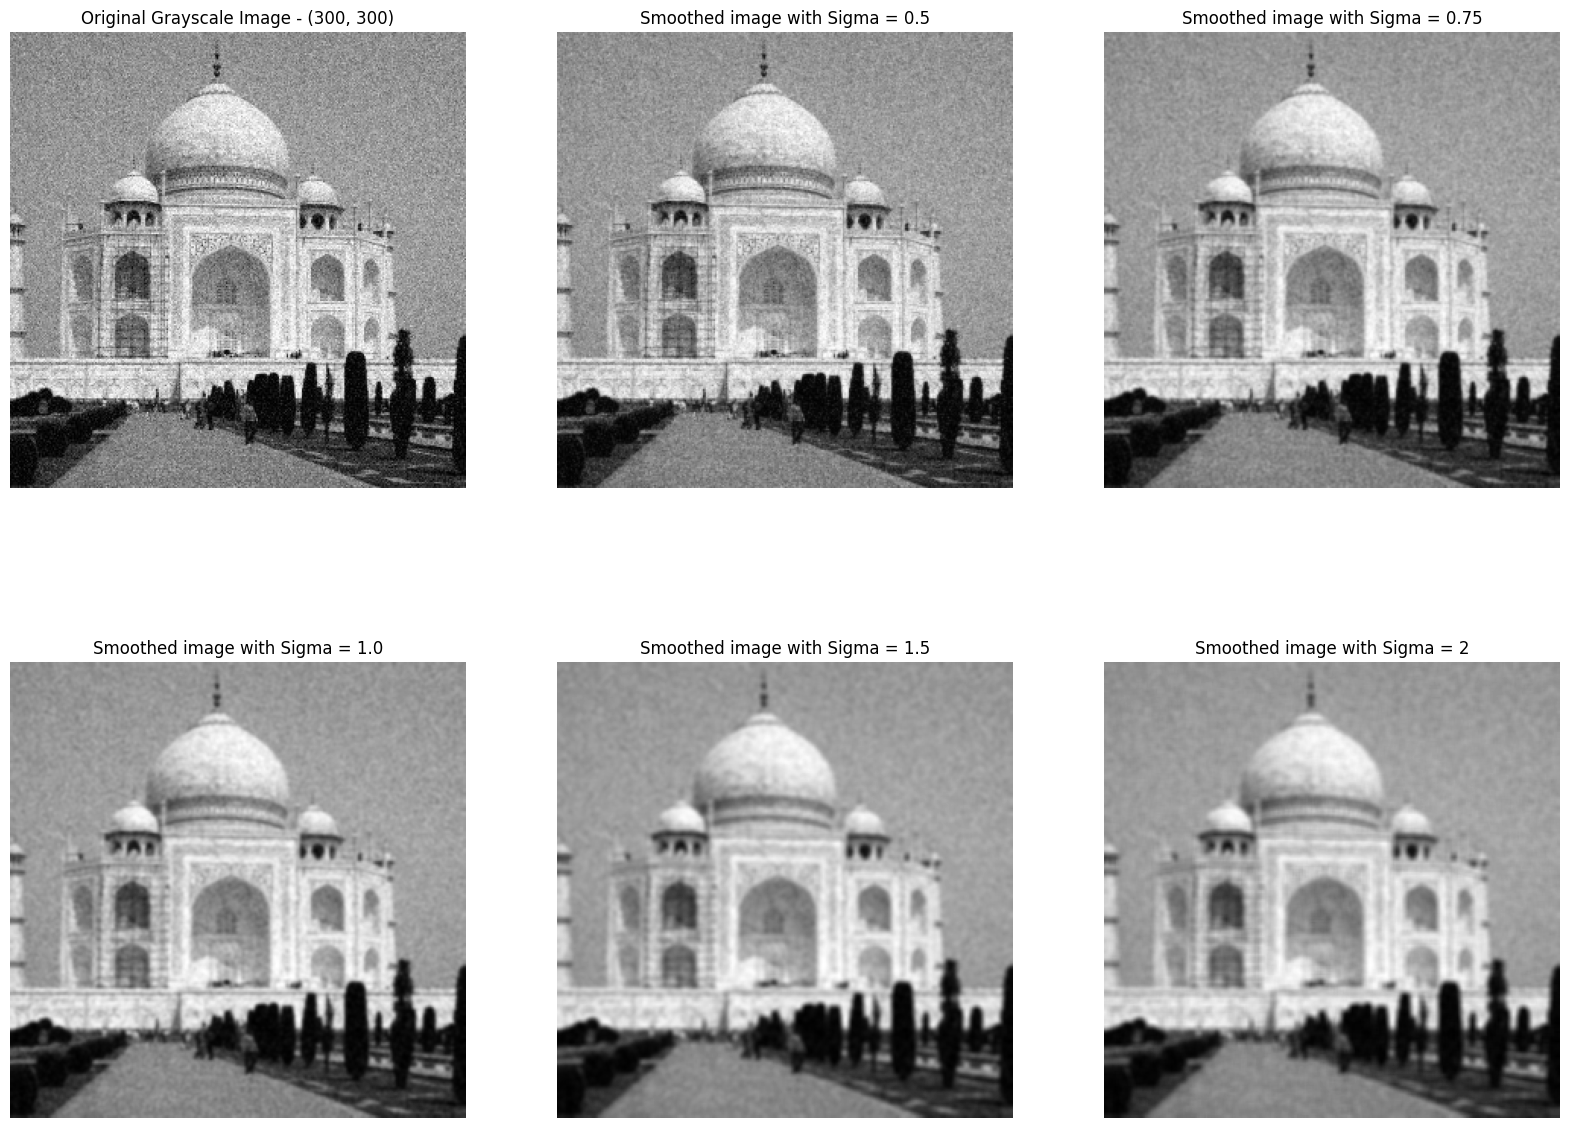

In [13]:
# Load the image and convert to grayscale 
image = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)

# Generate and display the 2D Gaussian kernel 
kernel_size =5 #5x5 kernel
sigmas = [0.5,0.75,1.0,1.5,2]
smoothed_images = []
gaussian_kernels_2d = []

for sigma in sigmas:
    gaussian_kernel_2d = gaussian_kernel(kernel_size,sigma)
    gaussian_kernels_2d.append(gaussian_kernel_2d)
    print(f"\nGaussian Kernel (5x5) with sigma - {sigma}\n", gaussian_kernel_2d)
    
    #Apply the Gaussian filter to the image using OpenCV's filter2D 
    smoothed_image = cv2.filter2D(image, -1, gaussian_kernel_2d,)
    smoothed_images.append(smoothed_image)

# Display the original and convolved images 
plt.figure(figsize=(20, 15)) 
plt.subplot(2, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.axis("off")
plt.title(f"Original Grayscale Image - {image.shape}") 


for i in range(len(smoothed_images)):
    plt.subplot(2, 3, i+2)
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.title(f"Smoothed image with Sigma = {sigmas[i]}") 
    plt.axis("off")
    


As we can see from the code, we have tried 5x5 kernels with different sigma values. As we increase the sigma, the image becomes more blurred and loses the edge details. Although, the choice of standard deviation depends on the application, it would be optimal to have the standard deviation less than 1 so that there is less information loss while using the Gaussian filter.

#  5. Gaussian Pyramid Construction

**Task:** Compute a Gaussian pyramid for an input image and display the pyramid layers. Scale the pyramid layers to the size of the original image for comparison. Report what you observe in the successive pyramid layers.. 

**Hints:**
- Use cv2.pyrDown() to create each successive level of the Gaussian pyramid.
- Use cv2.resize() to scale the pyramid layers back to the original image size for visualization.
- To display multiple images side by side, use matplotlib.pyplot 

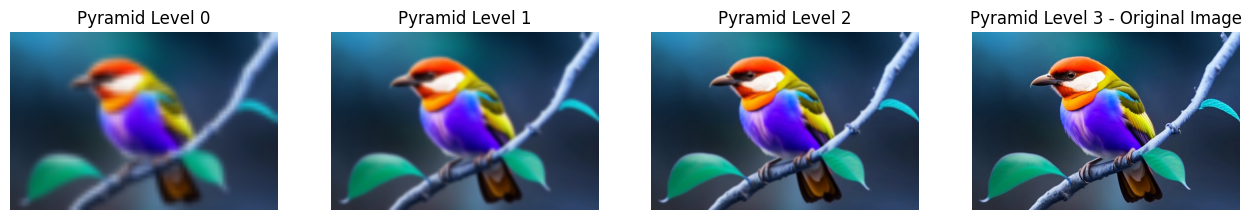

In [14]:
# Starter code:

# Compute Gaussian pyramid 

def gaussian_pyramid(image, levels=3):
    pyramid = [None] * (levels+1)
    pyramid[levels] = image
    pyramid_level = image
    for level in range(levels-1,-1,-1):
        pyramid_level = cv2.pyrDown(pyramid_level)
        pyramid[level] = pyramid_level

    return pyramid

image = cv2.imread('image.jpg')
#Display pyramid with resized layers 
pyramid_layers = gaussian_pyramid(image) 
resized_pyramid_layers = [cv2.resize(layer, (image.shape[1], image.shape[0])) for layer in pyramid_layers]

# Display results 
plt.figure(figsize=(20, 10)) 
for i, layer in enumerate(resized_pyramid_layers): 
    plt.subplot(1, len(resized_pyramid_layers)+1, i + 1) 
    plt.imshow(layer) 
    plt.axis("off")
    if i!= len(resized_pyramid_layers)-1:
        plt.title(f"Pyramid Level {i}")
    else:
        plt.title(f"Pyramid Level {i} - Original Image")




From above images , we see that as we move up the pyramid from the original image, the images appear blurred due to the sampling by half of the previous layer. The top layer images appear smoother but have also lost some edge information

# 6. Image Gradients and Histogram of Gradient Directions 

**Task:** Compute and display the image gradients for a given grayscale test image. Display gradients only above a certain magnitude. Then, compute and plot a histogram of the gradient directions. Use simple test images (e.g., square or circle) to verify the correctness of your implementation.

**Hints:** 
- Use the Sobel operator with cv2.Sobel() to compute the gradients in the x and y directions. 
- Calculate the gradient magnitude using numpy.sqrt() 
- Compute the gradient direction using numpy.arctan2() 
- Use OpenCV's cv2.arrowedLine() to draw gradient vectors (arrows) on the image. 
- Use matplotlib.pyplot.hist() to plot the histogram of gradient directions. . 


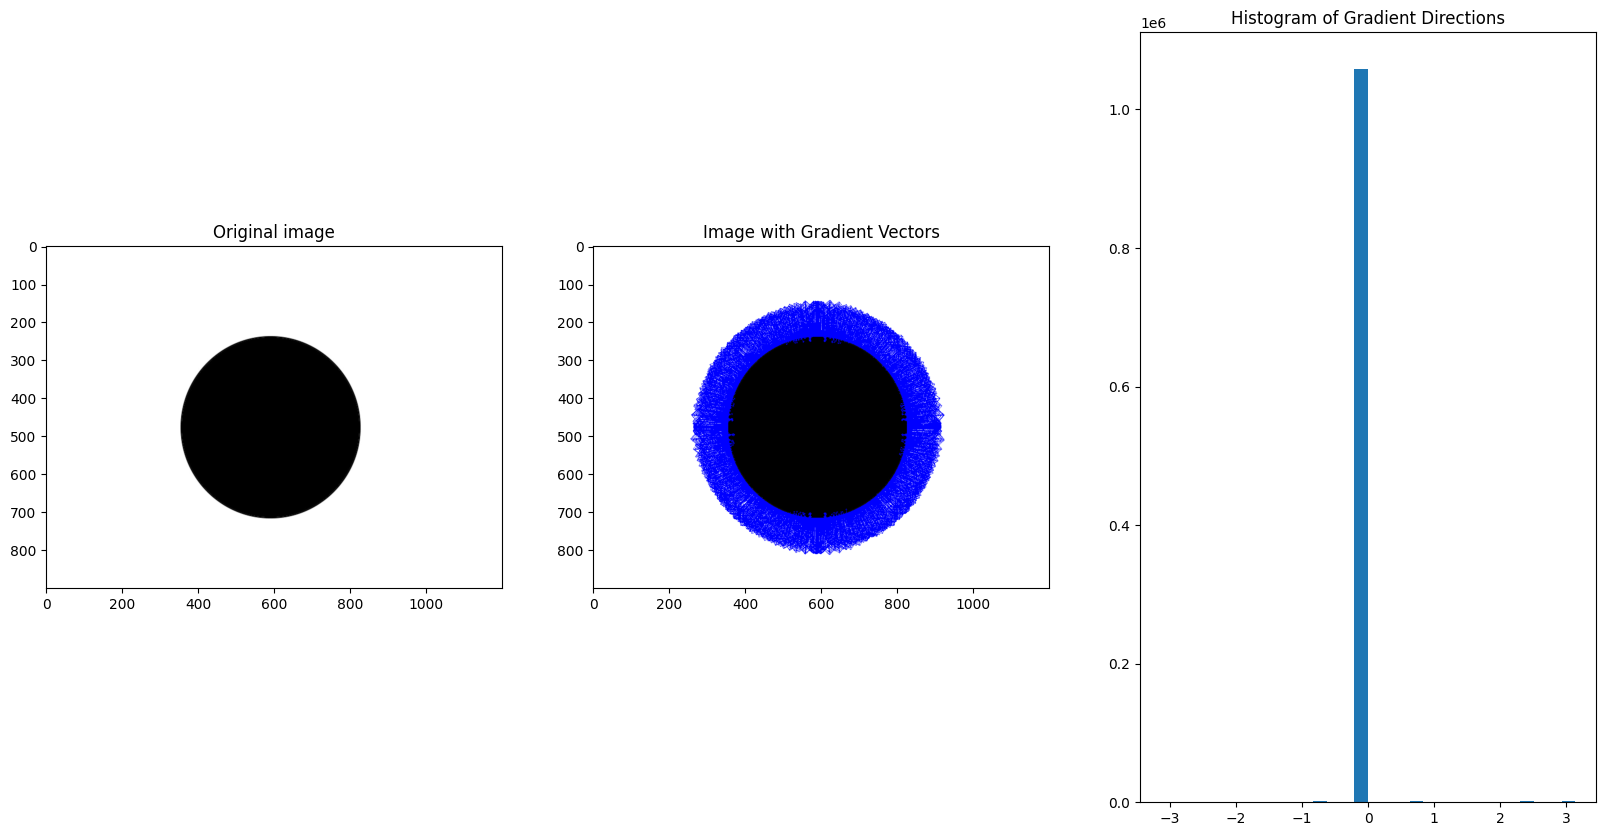

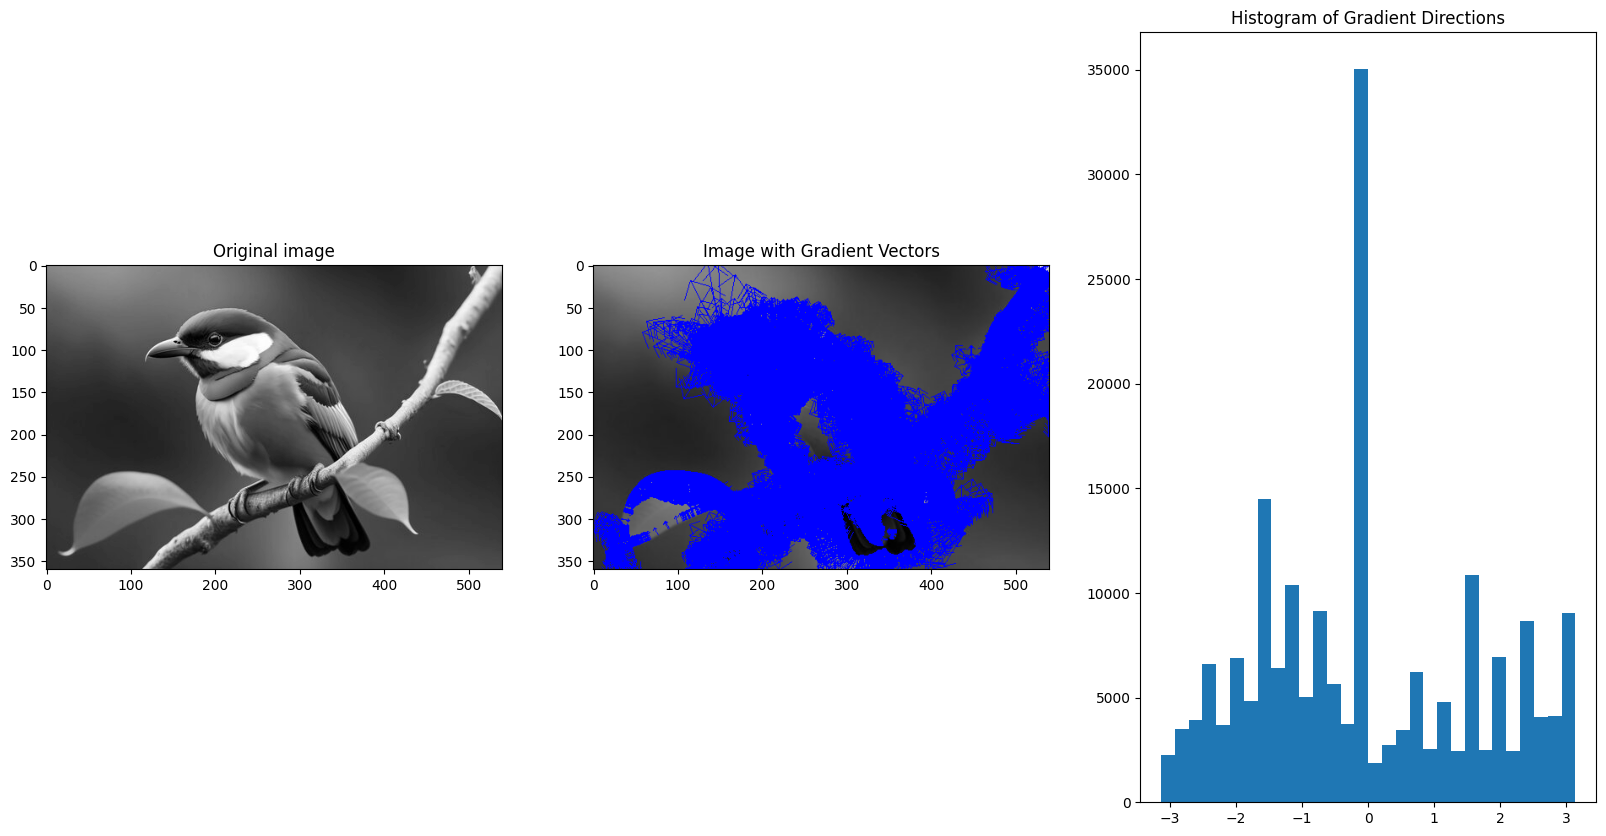

In [15]:
#Starter code:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def image_gradients_histogram(image_name):

    #Load the image 
    image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

    # Compute gradients 
    grad_x = cv2.Sobel(src=image,ddepth=cv2.CV_64F, dx=1, dy=0)
    grad_y = cv2.Sobel(src=image, ddepth=cv2.CV_64F,dx=0,dy=1)
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y,grad_x)

    # Draw gradient vectors 
    image_with_vectors = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    threshold = 100 
    strong_magnitudes = magnitude > threshold 
    y_coords, x_coords =  np.where(strong_magnitudes)


    # Draw gradient vectors (arrows) on the image 
    for y, x in zip(y_coords, x_coords): 
        dx = int(grad_x[y, x] / 10) 
        dy = int(grad_y[y, x] / 10) 
        start_point = (x, y) 
        end_point  = (x+ dx, y + dy) 
        cv2.arrowedLine(image_with_vectors, start_point, end_point,(0, 0, 255), 1, tipLength=0.3)

    #Display the results 
    plt.figure(figsize=(20, 10)) 

    plt.subplot(1,3,1)
    plt.imshow(image,cmap='gray')
    plt.title("Original image")


    plt.subplot(1,3,2)
    plt.imshow(image_with_vectors)
    plt.title("Image with Gradient Vectors")


    plt.subplot(1,3,3)
    plt.hist(direction.ravel(), bins=30) 
    plt.title("Histogram of Gradient Directions") 
    plt.show()

image_gradients_histogram('circle.jpg')
image_gradients_histogram('image.jpg')

# 7. Gaussian Derivatives Gradients

**Task:** Implement separable Gaussian derivative convolution filters to compute the x and y derivatives of an image. For x derivatives, first, convolve the image with a horizontal Gaussian derivative filter in the x direction, and then convolve it with a vertical Gaussian a smoothing filter in the y direction. For y derivatives, first, convolve the image with a vertical a Gaussian derivative filter in the y direction, and then convolve it with a horizontal Gaussian a smoothing filter in the x direction. Display the x and y derivatives of the image as two separate images

**Hints:**
- Define gaussian_1d and gaussian_derivative_1d functions
- Use NumPy's reshape function to reshape them to be horizontal or vertical. 
- Use cv2. filter2D() to apply these filters to the image. 


In [16]:
#Starter code:

import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Function to generate 1D Gaussian kernel 

def gaussian_1d(size, sigma): 
    
    kernel = np.ones(size)
    middle = size // 2
    for i in range(size):        
            x = i - middle            
            kernel[i] = np.exp(-(x**2)/(2*sigma**2))
    kernel = kernel/np.sum(kernel)   

    return kernel

# Function to generate 1D Gaussian derivative kernel 

def gaussian_derivative_1d(size, sigma): 
    
    kernel = np.ones(size)
    middle = size // 2
    for i in range(size):        
            x = i - middle            
            kernel[i] = -(x/sigma**2) * np.exp(-(x**2)/(2*sigma**2))
    return kernel


 # Define parameters for Gaussian filters 
 
kernel_size = 5 
sigma = 1.0

# Compute 1D filters 
gaussian_x = gaussian_1d(kernel_size,sigma).reshape(1,-1)
gaussian_y = gaussian_1d(kernel_size,sigma).reshape(-1,1)
gaussian_derivative_x = gaussian_derivative_1d(kernel_size,sigma).reshape(1,-1)
gaussian_derivative_y = gaussian_derivative_1d(kernel_size,sigma).reshape(-1,1)

print("Gaussian X \n",gaussian_x)
print("Gaussian Y\n",gaussian_y)
print("Gaussian Derivative X\n",gaussian_derivative_x)
print("Gaussian Derivative Y\n",gaussian_derivative_y)


Gaussian X 
 [[0.05448868 0.24420134 0.40261995 0.24420134 0.05448868]]
Gaussian Y
 [[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]
Gaussian Derivative X
 [[ 0.27067057  0.60653066 -0.         -0.60653066 -0.27067057]]
Gaussian Derivative Y
 [[ 0.27067057]
 [ 0.60653066]
 [-0.        ]
 [-0.60653066]
 [-0.27067057]]


Image X Derivative
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [-2.2368631e+02 -2.2368631e+02 -6.9020996e+01 ... -5.0961971e-06
   6.9020988e+01  2.2368631e+02]
 [-2.1149794e+02 -2.1149794e+02 -6.5260132e+01 ... -4.8185120e-06
   6.5260124e+01  2.1149794e+02]
 [-1.5687344e+02 -1.5687344e+02 -4.8405113e+01 ... -3.5740140e-06
   4.8405109e+01  1.5687344e+02]]
Image Y Derivative
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [-1.5221833e-06 -3.5740140e-06 -4.8185120e-06 ... -5.0961

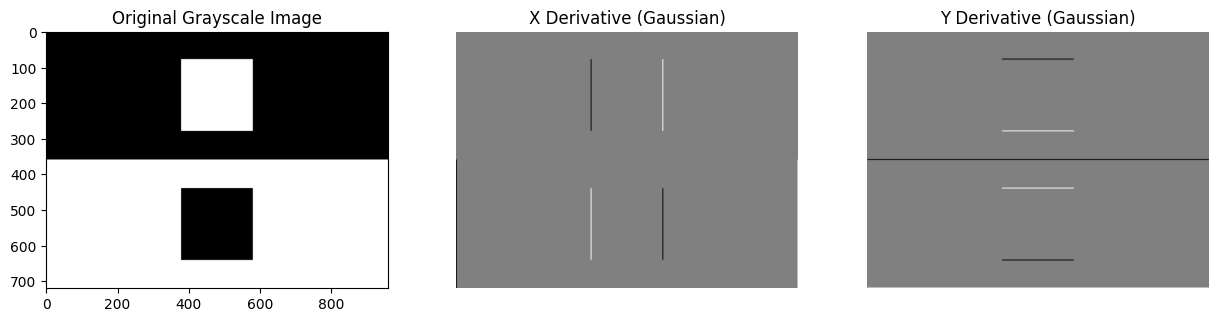

In [17]:
# Load the image and convert it to grayscale 
image = cv2.imread('square1.jpg', cv2.IMREAD_GRAYSCALE).astype(np.float32) # astype float helps to retain the negative values in the image array so that the negative edges(black to white) are also visible 

# Detect X derivative (Separable convolution)
image_x_derivative = cv2.filter2D(image,-1,gaussian_derivative_x,borderType=cv2.BORDER_CONSTANT)
image_x_derivative = cv2.filter2D(image_x_derivative,-1,gaussian_y,borderType=cv2.BORDER_CONSTANT)
print("Image X Derivative\n",image_x_derivative)

# Detect Y derivative (Separable convolution)
image_y_derivative = cv2.filter2D(image,-1,gaussian_derivative_y,borderType=cv2.BORDER_CONSTANT)
image_y_derivative = cv2.filter2D(image_y_derivative,-1,gaussian_x,borderType=cv2.BORDER_CONSTANT)
print("Image Y Derivative\n",image_y_derivative)


# Display the results 
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Grayscale Image") 
plt.subplot(1, 3, 2) 
plt.imshow(image_x_derivative, cmap='gray') 
plt.title("X Derivative (Gaussian)") 
plt.axis("off")

plt.subplot(1, 3, 3) 
plt.imshow(image_y_derivative, cmap='gray') 
plt.title("Y Derivative (Gaussian)") 
plt.axis("off")
plt.show()



# 8. Laplacian of Gaussian (LoG) Filtering


**Task:** Filter an image using a Laplacian of Gaussian (LoG) filter. Display the zero crossings of the LoG to detect edges. Demonstrate the correctness of the method with test images.

**Hints:**
-  Compute a Laplacian of Gaussian filter by computing the Laplacian of a Gaussian function and samplig it, or by convolving a discrete Gaussian filter with a discrete 3x3 Laplacian filter.
-  Use cv2 filter2D() to apply these filters to the image. 
-  To detect zero-crossings in the LOG image, convert it to a binary image (0 for non- positive and 1 for positive values), then detect transitions between 0 and 1.

$$
\text{LoG}(x, y) = \frac{v^2 - 2\sigma^2}{\sigma^4} e^{-\frac{v^2}{2\sigma^2}}
$$

where
$$ 
v^2 = x^2 + y^2
$$

Zero crossings
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


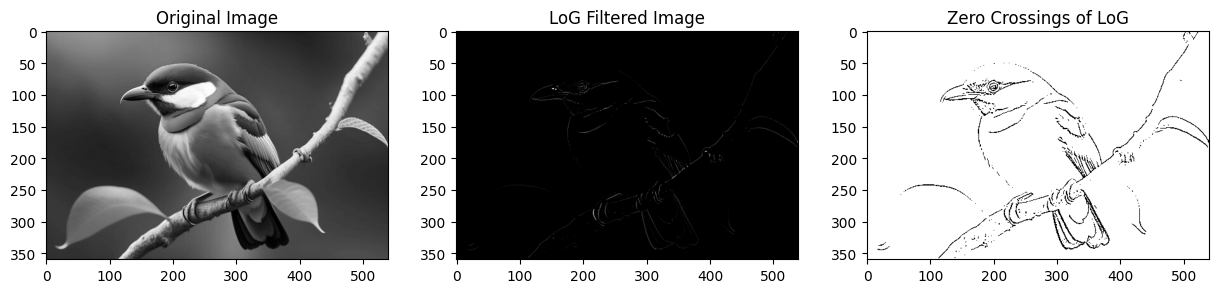

In [20]:
# Starter code
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import ndimage

# Function to create a Laplacian of Gaussian filter 

def laplacian_of_gaussian(size, sigma):   
    
    kernel = np.ones((size,size))
    middle = size // 2
    for i in range(size):  
        for j in range(size):      
            x = i - middle
            y = j - middle       
            v_sq = x**2 + y **2  
            _exp = np.exp(-(v_sq)/(2*sigma**2))   
            kernel[i][j] = ((v_sq-2*sigma**2)/sigma**4) * _exp
    kernel = kernel/np.sum(kernel) 

    return kernel

# Apply the LoG filter to the image 

def apply_log(image, size, sigma): 
    
    log_filter = laplacian_of_gaussian(size, sigma) 
    log_filtered_image = cv2.filter2D(image, -1, log_filter) 
    
    return log_filtered_image

# Detect zero crossings 

def detect_zero_crossings(log_image): 
    
    # Define the 1D filters for horizontal and vertical derivatives 
    
    horizontal_filter = np.array([[-1, 1]]) # Horizontal 1x2 filter 
    
    vertical_filter = np.array([[-1], [1]]) # Vertical 2x1 filter

    # Convolve the image with the horizontal and vertical filters 
 
    horizontal_edges = cv2.filter2D(log_image, -1, horizontal_filter) 
    vertical_edges = cv2.filter2D(log_image, -1, vertical_filter)
    
    # Detect zero crossings by checking for sign changes between adjacent pixels 
    
    zero_crossings = np.zeros_like(log_image) 
    zero_crossings[(horizontal_edges > 0) & (horizontal_edges < 0)]= 1
    zero_crossings[(vertical_edges > 0) & (vertical_edges <0)]= 1 
    zero_crossings[(horizontal_edges == 0) & (vertical_edges == 0)] = 1

    return zero_crossings
 
# Load the image 
image = cv2.imread ("image.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Laplacian of Gaussian (LoG) 
size = 5 # Filter size 
sigma =1.0 # Standard deviation 
log_filtered_image = apply_log(image, size, sigma) 
zero_crossings = detect_zero_crossings(log_filtered_image)
print("Zero crossings\n", zero_crossings)

# Display the original image, LoG-filtered 
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 3, 1) 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.subplot(1, 3, 2) 
plt.imshow(log_filtered_image, cmap='gray') 
plt.title("LoG Filtered Image") 
plt.subplot(1, 3, 3) 
plt.imshow(zero_crossings, cmap='gray') 
plt.title("Zero Crossings of LoG") 
plt.show()

